# Importing Required Libraries 

In [1]:
import requests,datetime,json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Api Setup

In [19]:
API_KEY = "8d9579bad99e253139a746fe370c2344"
location = "Chennai,IN"
api_url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={API_KEY}&units=metric"

# Interacting with OpenWeatherApi

In [20]:
response = requests.get(api_url)
weather_data = response.json()
weather_data['list'][0]['weather'][0]['description'] 
print(json.dumps(weather_data,indent=4))

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1731250800,
            "main": {
                "temp": 28.74,
                "feels_like": 33.06,
                "temp_min": 27.55,
                "temp_max": 28.74,
                "pressure": 1011,
                "sea_level": 1011,
                "grnd_level": 1011,
                "humidity": 75,
                "temp_kf": 1.19
            },
            "weather": [
                {
                    "id": 802,
                    "main": "Clouds",
                    "description": "scattered clouds",
                    "icon": "03n"
                }
            ],
            "clouds": {
                "all": 33
            },
            "wind": {
                "speed": 5.59,
                "deg": 29,
                "gust": 7.86
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "n"
            },
        

# Extracting relevant weather attributes : Temperature, humidity, wind speed, precipitation, description and Timestamp

In [21]:
Temperature = [data['main']['temp'] for data in weather_data['list']]
Humidity = [data['main']['humidity'] for data in weather_data['list']]
Description = [data['weather'][0]['description'] for data in weather_data['list']]
wind_speed = [data['wind']['speed'] for data in weather_data['list']]
timestamps = [data['dt'] for data in weather_data['list']]
Pressure = [data['main']['pressure'] for data in weather_data['list']]


# Making DataFrame, Cleaning : Handing missing values if any

In [22]:
date = pd.to_datetime(timestamps, unit='s')

In [23]:
weather_df = pd.DataFrame(
    {
        "Dates" : date,
        "Temperature" : Temperature,
        "Humidity" : Humidity,
        "wind_speed" : wind_speed,
        "Pressure" : Pressure,
        "Description" : Description
    }
)

In [24]:
weather_df

,Dates,Temperature,Humidity,wind_speed,Pressure,Description
0,2024-11-10 15:00:00,28.74,75,5.59,1011,scattered clouds
1,2024-11-10 18:00:00,27.86,73,5.39,1011,scattered clouds
2,2024-11-10 21:00:00,26.33,75,4.99,1009,few clouds
3,2024-11-11 00:00:00,25.40,80,5.25,1010,few clouds
4,2024-11-11 03:00:00,27.32,74,6.73,1012,scattered clouds
5,2024-11-11 06:00:00,29.73,63,8.05,1011,broken clouds
6,2024-11-11 09:00:00,28.58,65,7.95,1008,overcast clouds
7,2024-11-11 12:00:00,27.35,71,7.82,1008,overcast clouds
8,2024-11-11 15:00:00,27.62,72,7.02,1010,overcast clouds
9,2024-11-11 18:00:00,27.47,74,7.36,1010,light rain


In [25]:
weather_df.isnull().sum()

Dates          0
Temperature    0
Humidity       0
wind_speed     0
Pressure       0
Description    0
dtype: int64

# Perform Data Modeling to Analyze weather patttern, such as average temperature, Maximum temperature, Minimum temperature

In [26]:
avg_temperature = weather_df['Temperature'].mean()
min_temperature = weather_df['Temperature'].min()
max_temperature = weather_df['Temperature'].max()
print("+----- Weather Pattern -------+")
print(f"| Average Temperature : {avg_temperature:.2f} |")
print(f"| Minimum Temperature : {min_temperature} |")
print(f"| Maximum Temperature : {max_temperature} |")
print("+-----------------------------+")

+----- Weather Pattern -------+
| Average Temperature : 27.08 |
| Minimum Temperature : 25.3 |
| Maximum Temperature : 29.73 |
+-----------------------------+


# Data Aggregation techniques to summarize weather statistics by specific time periods 
+ Daily
+ Monthly
+ Seasonal

In [27]:
weather_df.set_index('Dates', inplace=True)

In [28]:
temperature_daily = weather_df['Temperature'].resample('D').mean()
temperature_Montly = weather_df['Temperature'].resample('ME').mean()
temperature_Seasonal = weather_df['Temperature'].resample('QE').mean()

In [29]:
print("+------- Data Aggregation : Temperature [Daily]  ------------+")
print(temperature_daily)
print("\n+------- Data Aggregation : Temperature [Monthly]  ------------+")
print(temperature_Montly)
print("\n+------- Data Aggregation : Temperature [Seasonal]  ------------+")
print(temperature_Seasonal)


+------- Data Aggregation : Temperature [Daily]  ------------+
Dates
2024-11-10    27.643333
2024-11-11    27.485000
2024-11-12    27.353750
2024-11-13    26.505000
2024-11-14    27.582500
2024-11-15    25.772000
Freq: D, Name: Temperature, dtype: float64

+------- Data Aggregation : Temperature [Monthly]  ------------+
Dates
2024-11-30    27.08
Freq: ME, Name: Temperature, dtype: float64

+------- Data Aggregation : Temperature [Seasonal]  ------------+
Dates
2024-12-31    27.08
Freq: QE-DEC, Name: Temperature, dtype: float64


# Visualize the Weather Data - Mean of daily Temperature

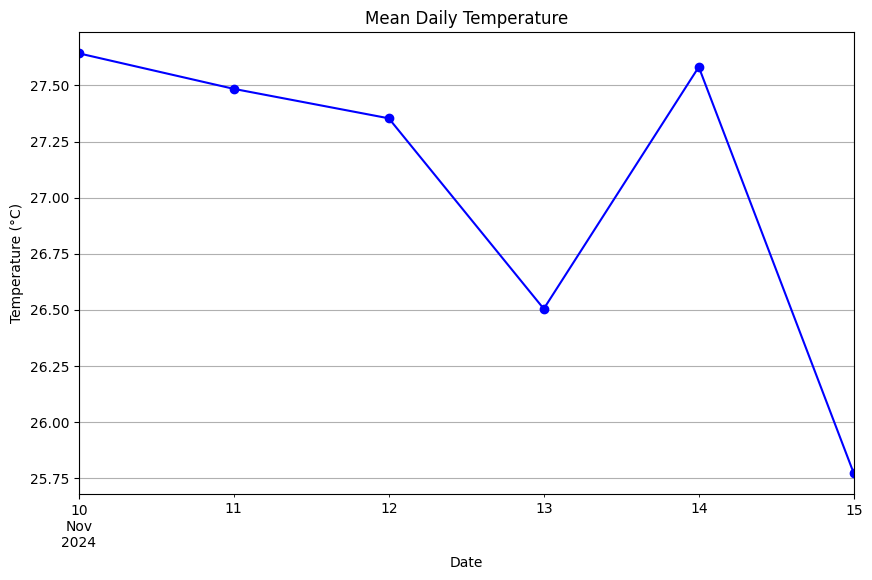

In [30]:
plt.figure(figsize=(10, 6))
temperature_daily.plot(color='Blue', linestyle='-', marker='o')                    
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Visualize the Weather Data - Mean of daily Humidity

In [31]:
humidity_daily = weather_df['Humidity'].resample('D').mean()

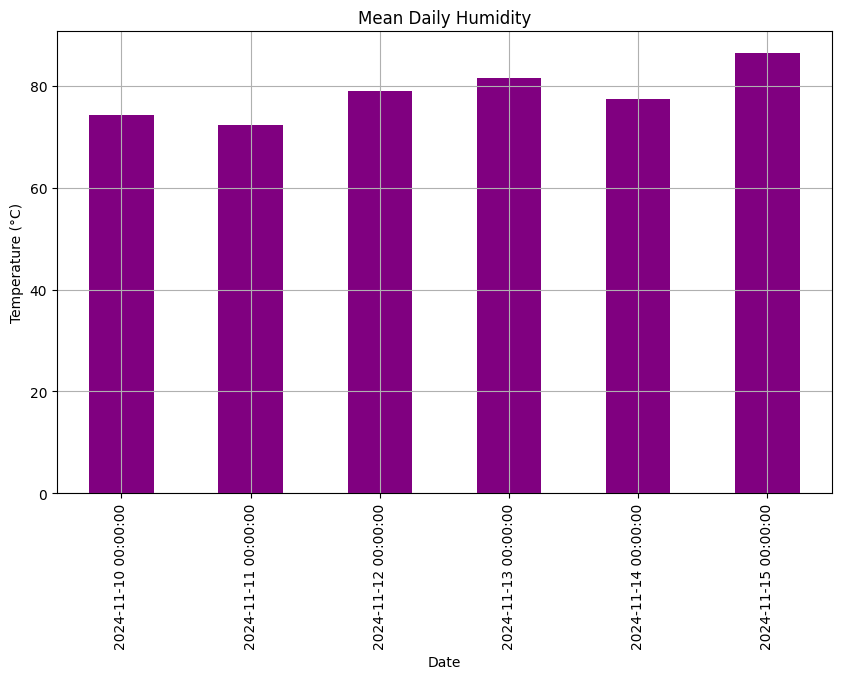

In [32]:
plt.figure(figsize=(10, 6))
humidity_daily.plot(color='purple', kind='bar')                    
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Visualize Relationship between weather attributes 

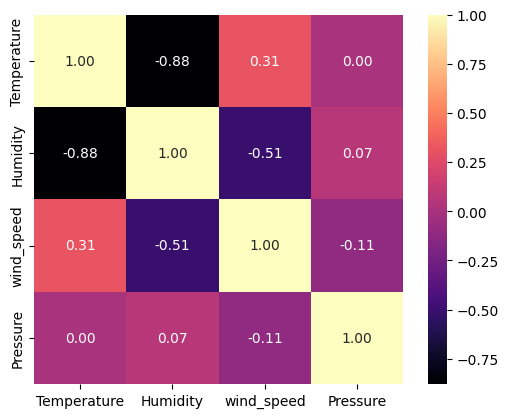

<Figure size 1000x500 with 0 Axes>

In [33]:
correlation_matrix = weather_df[['Temperature','Humidity','wind_speed','Pressure']].corr()
sns.heatmap(correlation_matrix,fmt='.2f',annot=True,cmap='magma',square=True)
plt.figure(figsize=(10,5))
plt.show()

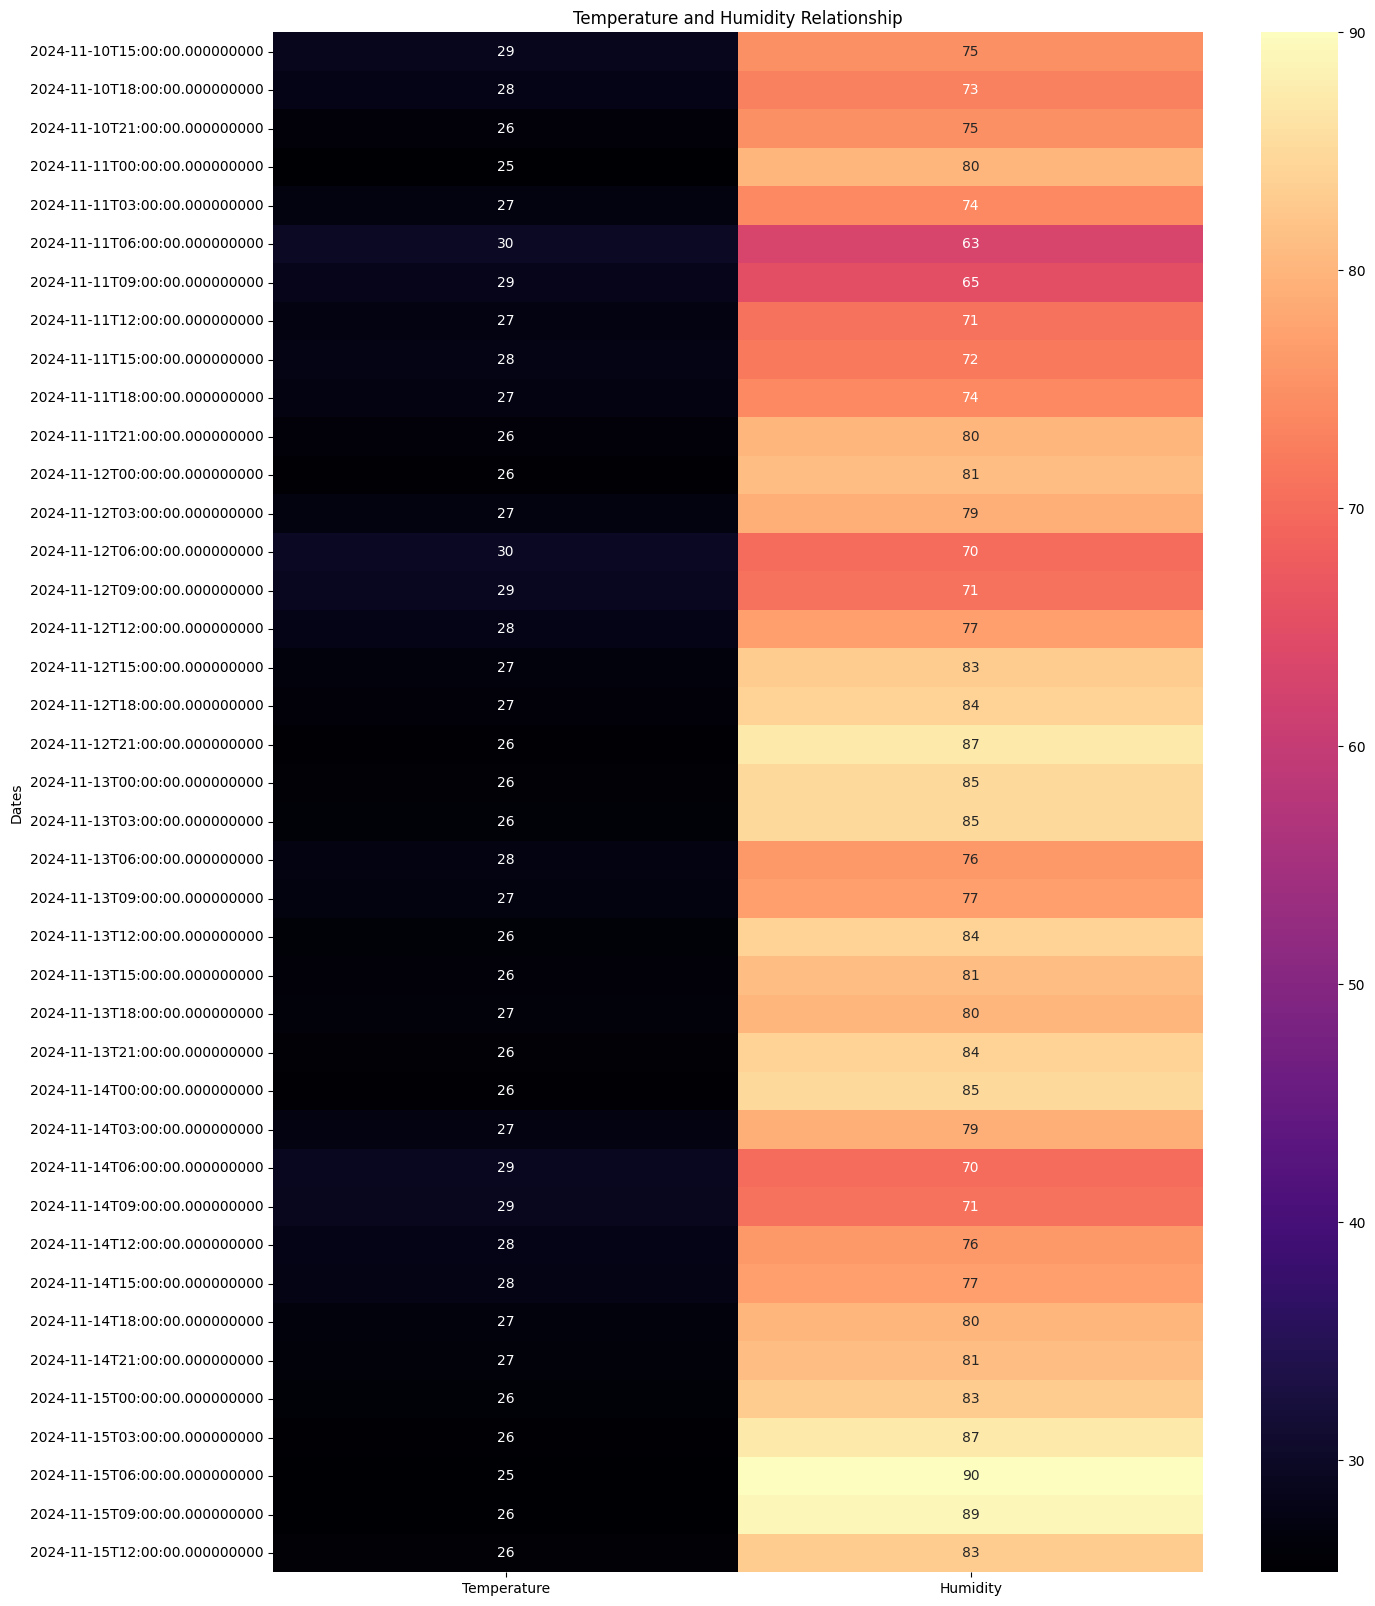

In [34]:
data_compare = weather_df[['Temperature','Humidity']]
plt.figure(figsize=(15,20))
plt.title("Temperature and Humidity Relationship")
sns.heatmap(data_compare,cmap='magma',annot=True)
plt.show()

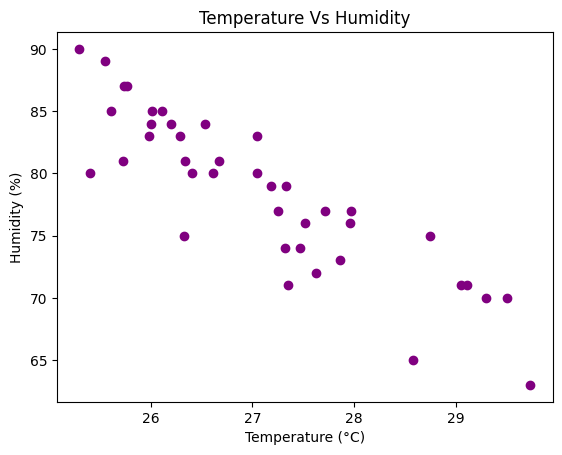

In [35]:
plt.scatter(weather_df['Temperature'], weather_df['Humidity'],color="purple")
plt.title("Temperature Vs Humidity")
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()